# 大语言模型(LLM)性能比较分析

本笔记本对大语言模型比较数据集进行探索性分析，主要研究不同模型的特性、性能和价格等关键指标。

**分析日期:** 2025年6月19日

**数据来源:** `github-copilot-features/notebook/llm_comparison_dataset.csv`

In [3]:
# This code is generated by GitHub Copilot (VS Code)
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图表风格和大小
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

## 1. 加载数据集

首先，我们从CSV文件中加载大语言模型比较数据集，并查看数据的基本信息。

In [4]:
# This code is generated by GitHub Copilot (VS Code)
# 读取CSV文件
file_path = '../github-copilot-features/notebook/llm_comparison_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print(f"数据集加载成功! 共有 {df.shape[0]} 行 和 {df.shape[1]} 列")
except Exception as e:
    # 如果上面的路径不正确，尝试直接使用相对路径
    try:
        df = pd.read_csv('llm_comparison_dataset.csv')
        print(f"数据集加载成功! 共有 {df.shape[0]} 行 和 {df.shape[1]} 列")
    except Exception as e2:
        print(f"加载数据失败: {e2}")
        raise e

数据集加载成功! 共有 200 行 和 15 列


In [5]:
# This code is generated by GitHub Copilot (VS Code)
# 查看数据的前几行
print("数据集前5行:")
df.head()

数据集前5行:


,Model,Provider,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating
0,DeepSeek-4,Deepseek,128000,95,2.74,85,1143,1,18.81,760952565,13,0.50,2,2,3
1,Llama-8,Meta AI,300000,284,3.21,71,1390,1,3.98,22891342,22,2.07,1,3,3
2,Llama-5,Meta AI,300000,225,2.95,85,1406,0,1.02,827422145,21,0.95,2,3,2
3,DeepSeek-3,Deepseek,2000000,242,12.89,72,1264,1,27.63,694305632,86,3.51,1,3,3
4,DeepSeek-8,Deepseek,1000000,71,3.80,77,1381,1,18.52,378552278,92,1.80,2,2,3


## 2. 探索数据结构

接下来，我们将探索数据结构，包括列名、数据类型、缺失值等信息，以便更好地理解数据集。

In [6]:
# This code is generated by GitHub Copilot (VS Code)
# 检查列名和数据类型
print("数据集的列名和数据类型:")
df.info()

数据集的列名和数据类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model                      200 non-null    object 
 1   Provider                   200 non-null    object 
 2   Context Window             200 non-null    int64  
 3   Speed (tokens/sec)         200 non-null    int64  
 4   Latency (sec)              200 non-null    float64
 5   Benchmark (MMLU)           200 non-null    int64  
 6   Benchmark (Chatbot Arena)  200 non-null    int64  
 7   Open-Source                200 non-null    int64  
 8   Price / Million Tokens     200 non-null    float64
 9   Training Dataset Size      200 non-null    int64  
 10  Compute Power              200 non-null    int64  
 11  Energy Efficiency          200 non-null    float64
 12  Quality Rating             200 non-null    int64  
 13  Speed Rating               200 non-nu

In [7]:
# This code is generated by GitHub Copilot (VS Code)
# 检查缺失值
missing_values = df.isnull().sum()
print("各列的缺失值数量:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "数据集中没有缺失值!")

各列的缺失值数量:
数据集中没有缺失值!


In [8]:
# This code is generated by GitHub Copilot (VS Code)
# 检查分类变量的唯一值
categorical_cols = ['Model', 'Provider', 'Open-Source']
for col in categorical_cols:
    print(f"\n列 '{col}' 的唯一值:")
    print(df[col].value_counts().sort_values(ascending=False))


列 'Model' 的唯一值:
Model
Command-9     8
DeepSeek-3    7
GPT-8         7
Mistral-8     6
Command-1     6
             ..
Nova-6        1
Claude-6      1
Llama-5       1
DeepSeek-9    1
DeepSeek-4    1
Name: count, Length: 70, dtype: int64

列 'Provider' 的唯一值:
Provider
Cohere        34
OpenAI        31
AWS           27
Meta AI       23
Google        23
Mistral AI    23
Deepseek      22
Anthropic     17
Name: count, dtype: int64

列 'Open-Source' 的唯一值:
Open-Source
0    102
1     98
Name: count, dtype: int64


## 3. 基本统计分析

下面我们将计算数值列的基本统计指标，包括均值、中位数、标准差等，以便了解数据的总体分布情况。

In [9]:
# This code is generated by GitHub Copilot (VS Code)
# 计算数值列的基本统计指标
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("数值列的基本统计指标:")
df[numeric_cols].describe()

数值列的基本统计指标:


,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.371800e+05,163.240000,9.358750,77.945000,1192.960000,0.490000,14.475200,4.902643e+08,46.915000,2.519100,1.900000,2.275000,2.910000
std,6.909439e+05,79.188106,5.489481,10.182356,174.649767,0.501154,8.890484,2.747544e+08,28.408679,1.458241,0.802008,0.625565,0.303911
min,1.280000e+05,20.000000,0.600000,60.000000,902.000000,0.000000,0.200000,2.012584e+06,2.000000,0.150000,1.000000,1.000000,1.000000
25%,2.000000e+05,93.750000,4.265000,69.000000,1043.250000,0.000000,6.090000,2.622976e+08,22.000000,1.150000,1.000000,2.000000,3.000000
50%,2.560000e+05,165.500000,8.820000,80.000000,1200.500000,0.000000,14.660000,5.002494e+08,43.500000,2.525000,2.000000,2.000000,3.000000
75%,1.000000e+06,236.000000,14.035000,87.000000,1343.750000,1.000000,21.515000,7.210857e+08,72.000000,3.807500,3.000000,3.000000,3.000000
max,2.000000e+06,294.000000,19.800000,94.000000,1493.000000,1.000000,29.890000,9.844345e+08,99.000000,4.980000,3.000000,3.000000,3.000000


C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\411577350.py:10: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\411577350.py:10: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\411577350.py:10: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\411577350.py:10: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\411577350.py:10: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\411577350.py:10: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missi

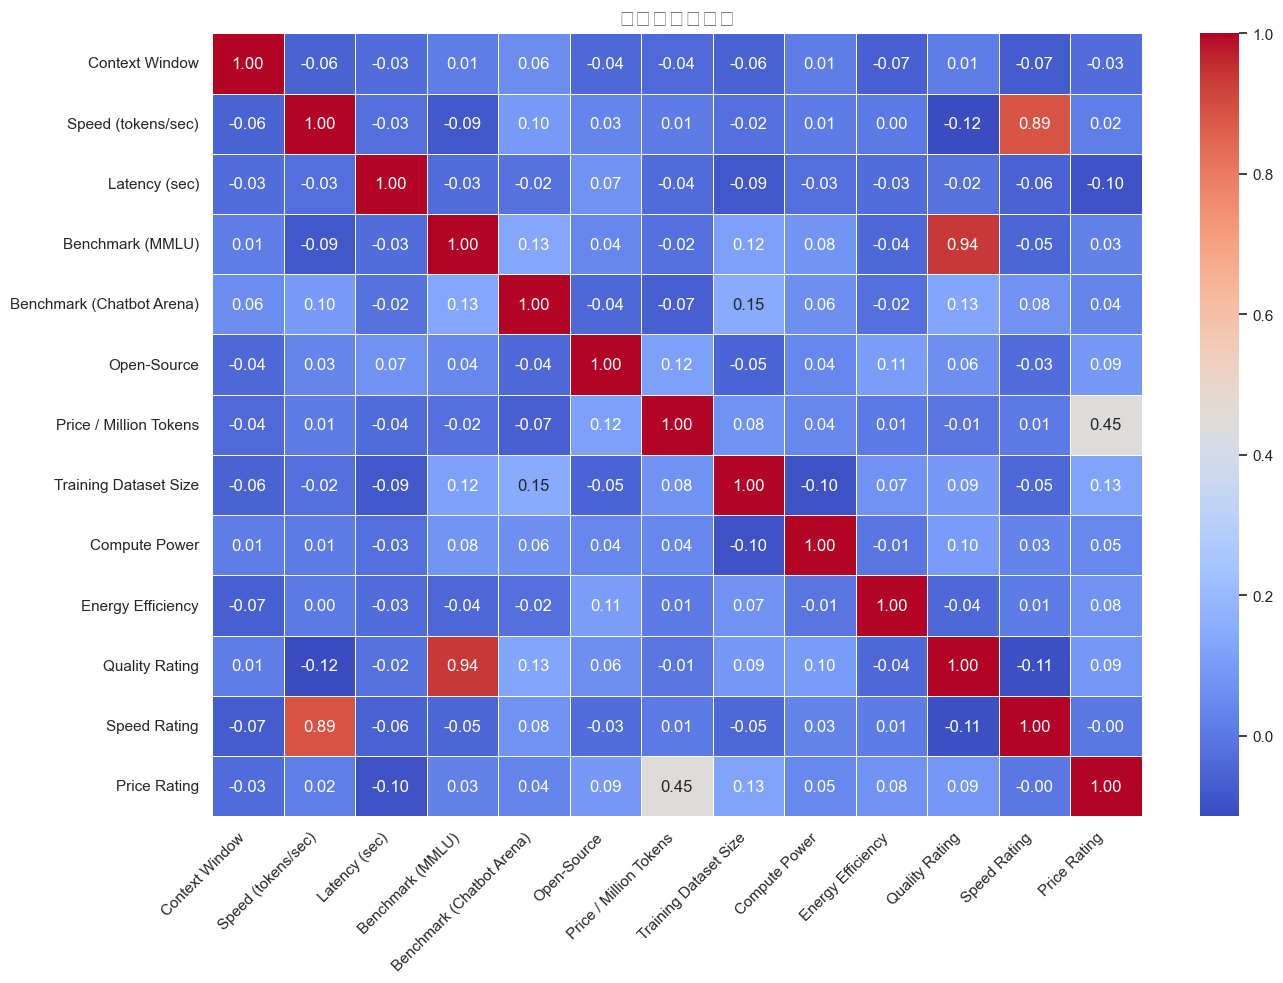

In [10]:
# This code is generated by GitHub Copilot (VS Code)
# 计算数值列之间的相关性
correlation = df[numeric_cols].corr()

# 绘制相关性热图
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('特征相关性热图', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. 特征分布可视化

接下来，我们将通过直方图和箱线图等可视化方法，探索主要特征的分布情况。

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\346621858.py:18: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\346621858.py:18: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\346621858.py:18: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\346621858.py:18: UserWarning: Glyph 31383 (\N{CJK UNIFIED IDEOGRAPH-7A97}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\346621858.py:18: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\346621858.py:18: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missi

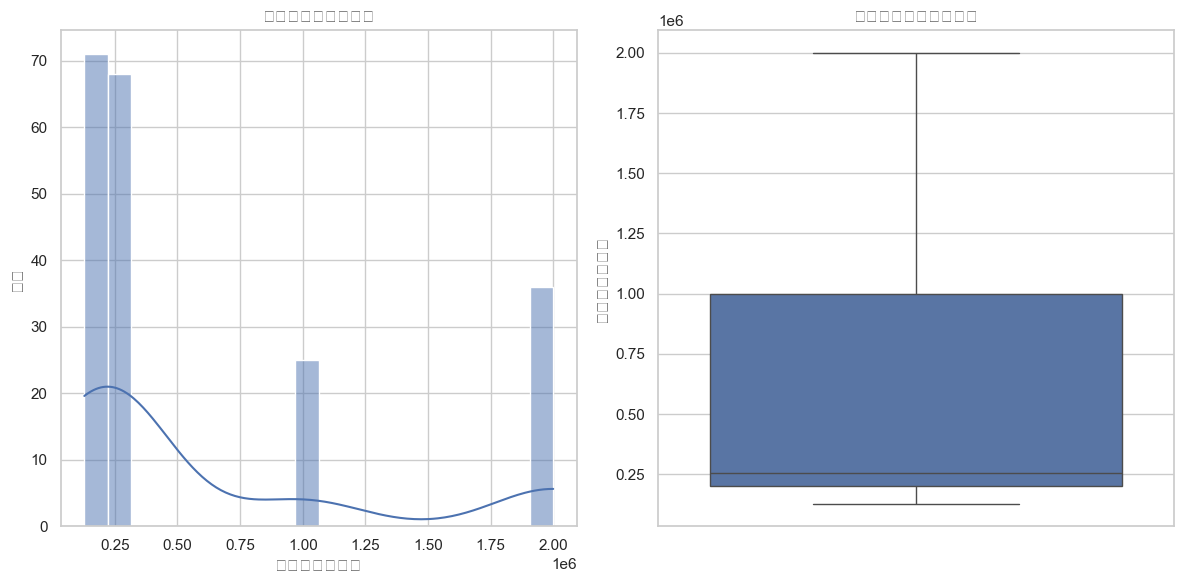

In [11]:
# This code is generated by GitHub Copilot (VS Code)
# 绘制上下文窗口大小分布
plt.figure(figsize=(12, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(df['Context Window'], bins=20, kde=True)
plt.title('上下文窗口大小分布')
plt.xlabel('上下文窗口大小')
plt.ylabel('频率')

# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Context Window'])
plt.title('上下文窗口大小箱线图')
plt.ylabel('上下文窗口大小')

plt.tight_layout()
plt.show()

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3707276999.py:27: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3707276999.py:27: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3707276999.py:27: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3707276999.py:27: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3707276999.py:27: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3707276999.py:27: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03})

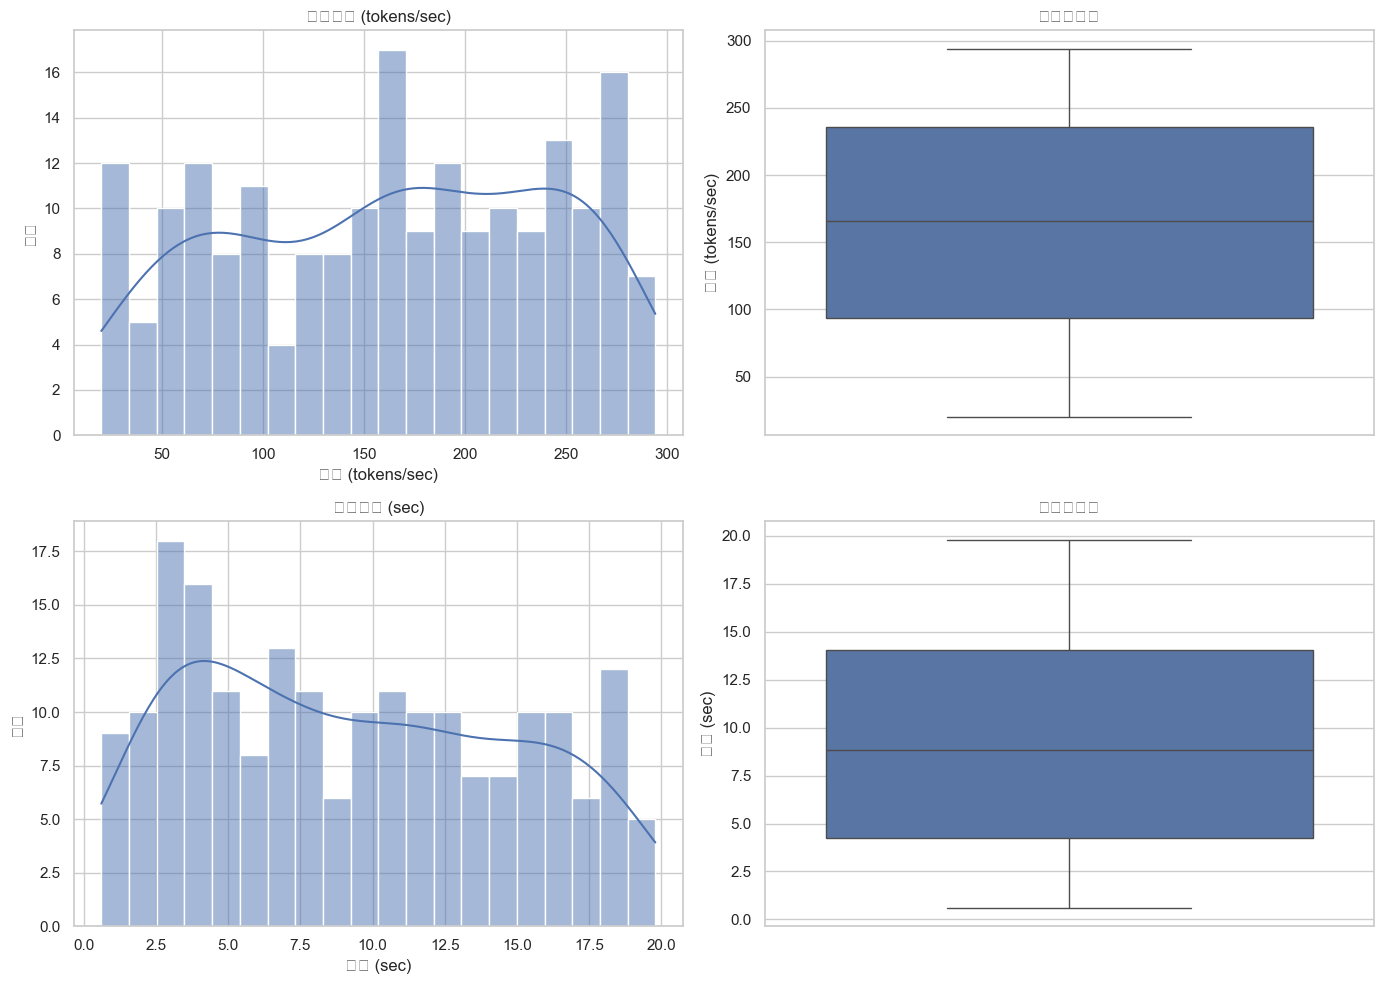

In [12]:
# This code is generated by GitHub Copilot (VS Code)
# 绘制速度和延迟分布
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 速度直方图
sns.histplot(df['Speed (tokens/sec)'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('速度分布 (tokens/sec)')
axes[0, 0].set_xlabel('速度 (tokens/sec)')
axes[0, 0].set_ylabel('频率')

# 速度箱线图
sns.boxplot(y=df['Speed (tokens/sec)'], ax=axes[0, 1])
axes[0, 1].set_title('速度箱线图')
axes[0, 1].set_ylabel('速度 (tokens/sec)')

# 延迟直方图
sns.histplot(df['Latency (sec)'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('延迟分布 (sec)')
axes[1, 0].set_xlabel('延迟 (sec)')
axes[1, 0].set_ylabel('频率')

# 延迟箱线图
sns.boxplot(y=df['Latency (sec)'], ax=axes[1, 1])
axes[1, 1].set_title('延迟箱线图')
axes[1, 1].set_ylabel('延迟 (sec)')

plt.tight_layout()
plt.show()

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1076122393.py:28: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1076122393.py:28: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1076122393.py:28: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1076122393.py:28: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1076122393.py:28: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1076122393.py:28: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6})

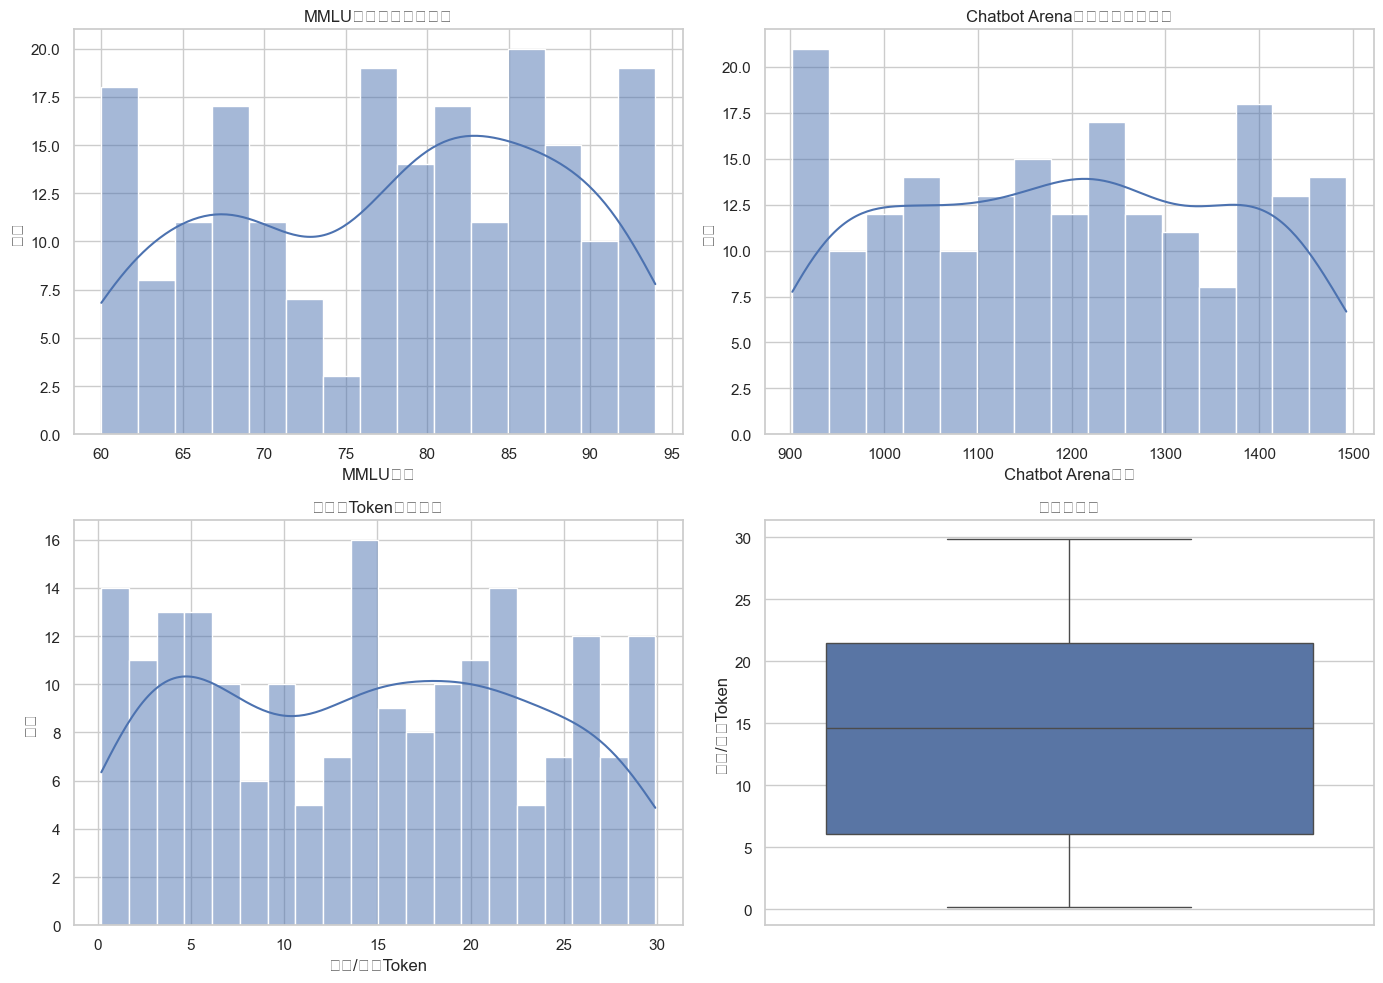

In [13]:
# This code is generated by GitHub Copilot (VS Code)
# 绘制基准测试和价格分布
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MMLU基准测试直方图
sns.histplot(df['Benchmark (MMLU)'], bins=15, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('MMLU基准测试分数分布')
axes[0, 0].set_xlabel('MMLU分数')
axes[0, 0].set_ylabel('频率')

# Chatbot Arena基准测试直方图
sns.histplot(df['Benchmark (Chatbot Arena)'], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Chatbot Arena基准测试分数分布')
axes[0, 1].set_xlabel('Chatbot Arena分数')
axes[0, 1].set_ylabel('频率')

# 价格直方图
sns.histplot(df['Price / Million Tokens'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('每百万Token价格分布')
axes[1, 0].set_xlabel('价格/百万Token')
axes[1, 0].set_ylabel('频率')

# 价格箱线图
sns.boxplot(y=df['Price / Million Tokens'], ax=axes[1, 1])
axes[1, 1].set_title('价格箱线图')
axes[1, 1].set_ylabel('价格/百万Token')

plt.tight_layout()
plt.show()

## 5. 大语言模型性能比较分析

下面我们将按不同维度比较各个模型的性能表现，包括不同提供商、开源与闭源模型等比较。

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1592396212.py:45: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1592396212.py:45: UserWarning: Glyph 20379 (\N{CJK UNIFIED IDEOGRAPH-4F9B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1592396212.py:45: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1592396212.py:45: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1592396212.py:45: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1592396212.py:45: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206})

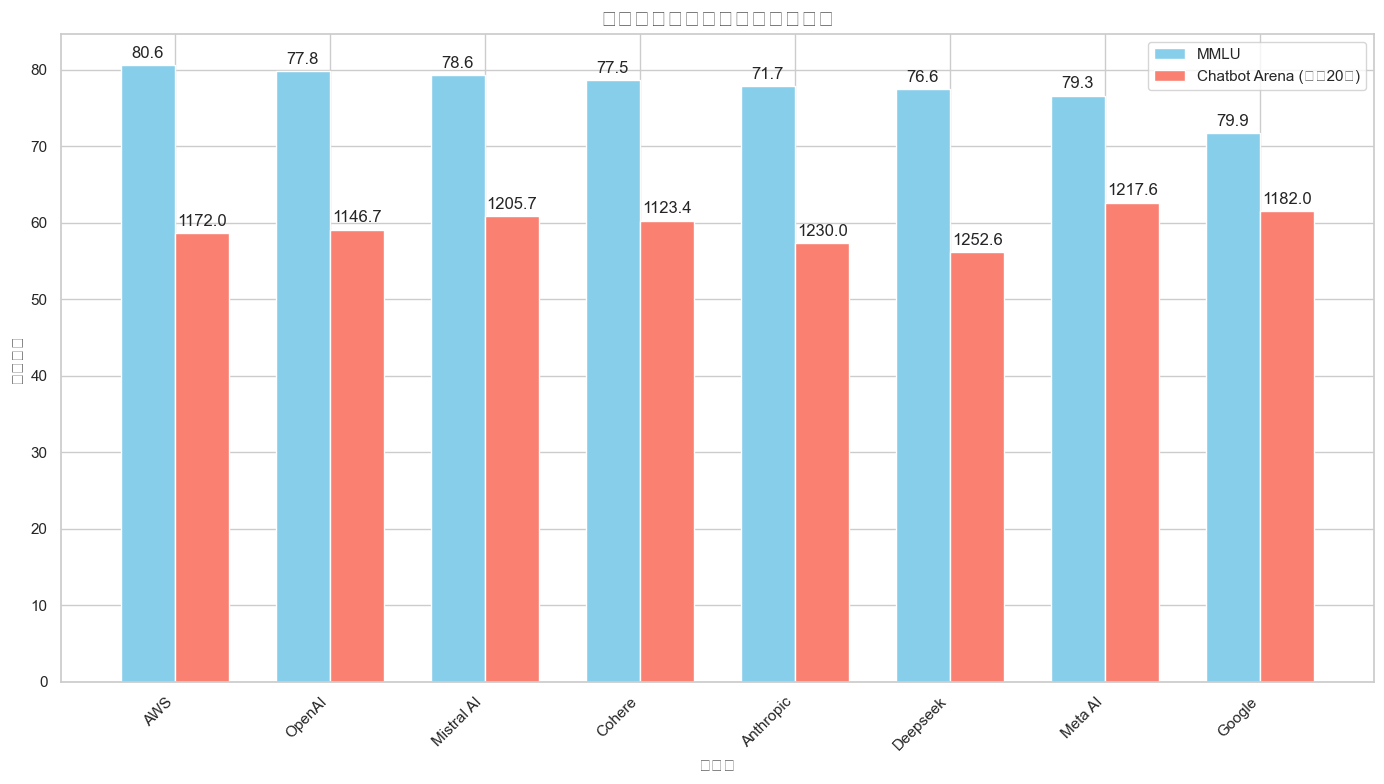

In [14]:
# This code is generated by GitHub Copilot (VS Code)
# 按提供商分组比较性能
provider_metrics = df.groupby('Provider').agg({
    'Context Window': 'mean',
    'Speed (tokens/sec)': 'mean',
    'Latency (sec)': 'mean',
    'Benchmark (MMLU)': 'mean',
    'Benchmark (Chatbot Arena)': 'mean',
    'Price / Million Tokens': 'mean',
    'Quality Rating': 'mean'
}).reset_index()

# 按平均MMLU分数排序
provider_metrics = provider_metrics.sort_values(by='Benchmark (MMLU)', ascending=False)

# 绘制不同提供商的MMLU和Chatbot Arena基准测试分数
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(provider_metrics))
width = 0.35

rects1 = ax.bar(x - width/2, provider_metrics['Benchmark (MMLU)'], width, label='MMLU', color='skyblue')
rects2 = ax.bar(x + width/2, provider_metrics['Benchmark (Chatbot Arena)']/20, width, label='Chatbot Arena (缩放20倍)', color='salmon')

ax.set_xlabel('提供商', fontsize=12)
ax.set_ylabel('平均分数', fontsize=12)
ax.set_title('不同提供商的基准测试平均分数', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(provider_metrics['Provider'], rotation=45, ha='right')
ax.legend()

# 添加数据标签
def autolabel(rects, values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{values[i]:.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3点垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, provider_metrics['Benchmark (MMLU)'])
autolabel(rects2, provider_metrics['Benchmark (Chatbot Arena)'])

plt.tight_layout()
plt.show()

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\340803370.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provider', y='Speed (tokens/sec)', data=provider_metrics, ax=axes[0], palette='viridis')
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\340803370.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provider', y='Latency (sec)', data=provider_metrics, ax=axes[1], palette='rocket')
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\340803370.py:23: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\340803370.py:23: UserWarning: Glyph 20379 (\N{CJK UNIFIED IDEOGRAPH-4F9

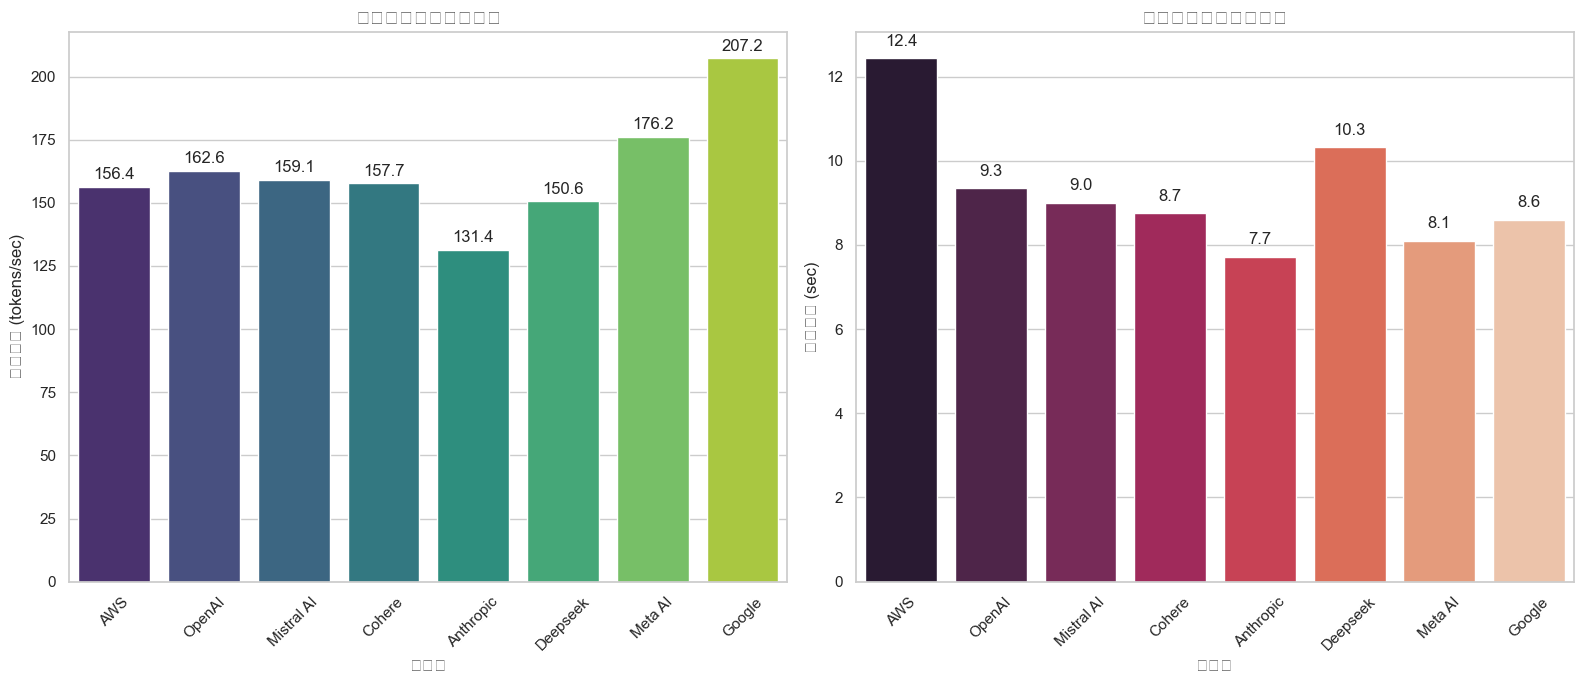

In [15]:
# This code is generated by GitHub Copilot (VS Code)
# 比较不同提供商的速度和延迟
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 速度比较
sns.barplot(x='Provider', y='Speed (tokens/sec)', data=provider_metrics, ax=axes[0], palette='viridis')
axes[0].set_title('各提供商平均速度比较', fontsize=14)
axes[0].set_xlabel('提供商', fontsize=12)
axes[0].set_ylabel('平均速度 (tokens/sec)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(provider_metrics['Speed (tokens/sec)']):
    axes[0].text(i, v + 3, f'{v:.1f}', ha='center')

# 延迟比较
sns.barplot(x='Provider', y='Latency (sec)', data=provider_metrics, ax=axes[1], palette='rocket')
axes[1].set_title('各提供商平均延迟比较', fontsize=14)
axes[1].set_xlabel('提供商', fontsize=12)
axes[1].set_ylabel('平均延迟 (sec)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(provider_metrics['Latency (sec)']):
    axes[1].text(i, v + 0.3, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1623203152.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Open-Source Type', y='Benchmark (MMLU)', data=opensource_metrics, ax=axes[0, 0], palette='Set2')
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1623203152.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Open-Source Type', y='Speed (tokens/sec)', data=opensource_metrics, ax=axes[0, 1], palette='Set2')
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\1623203152.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='

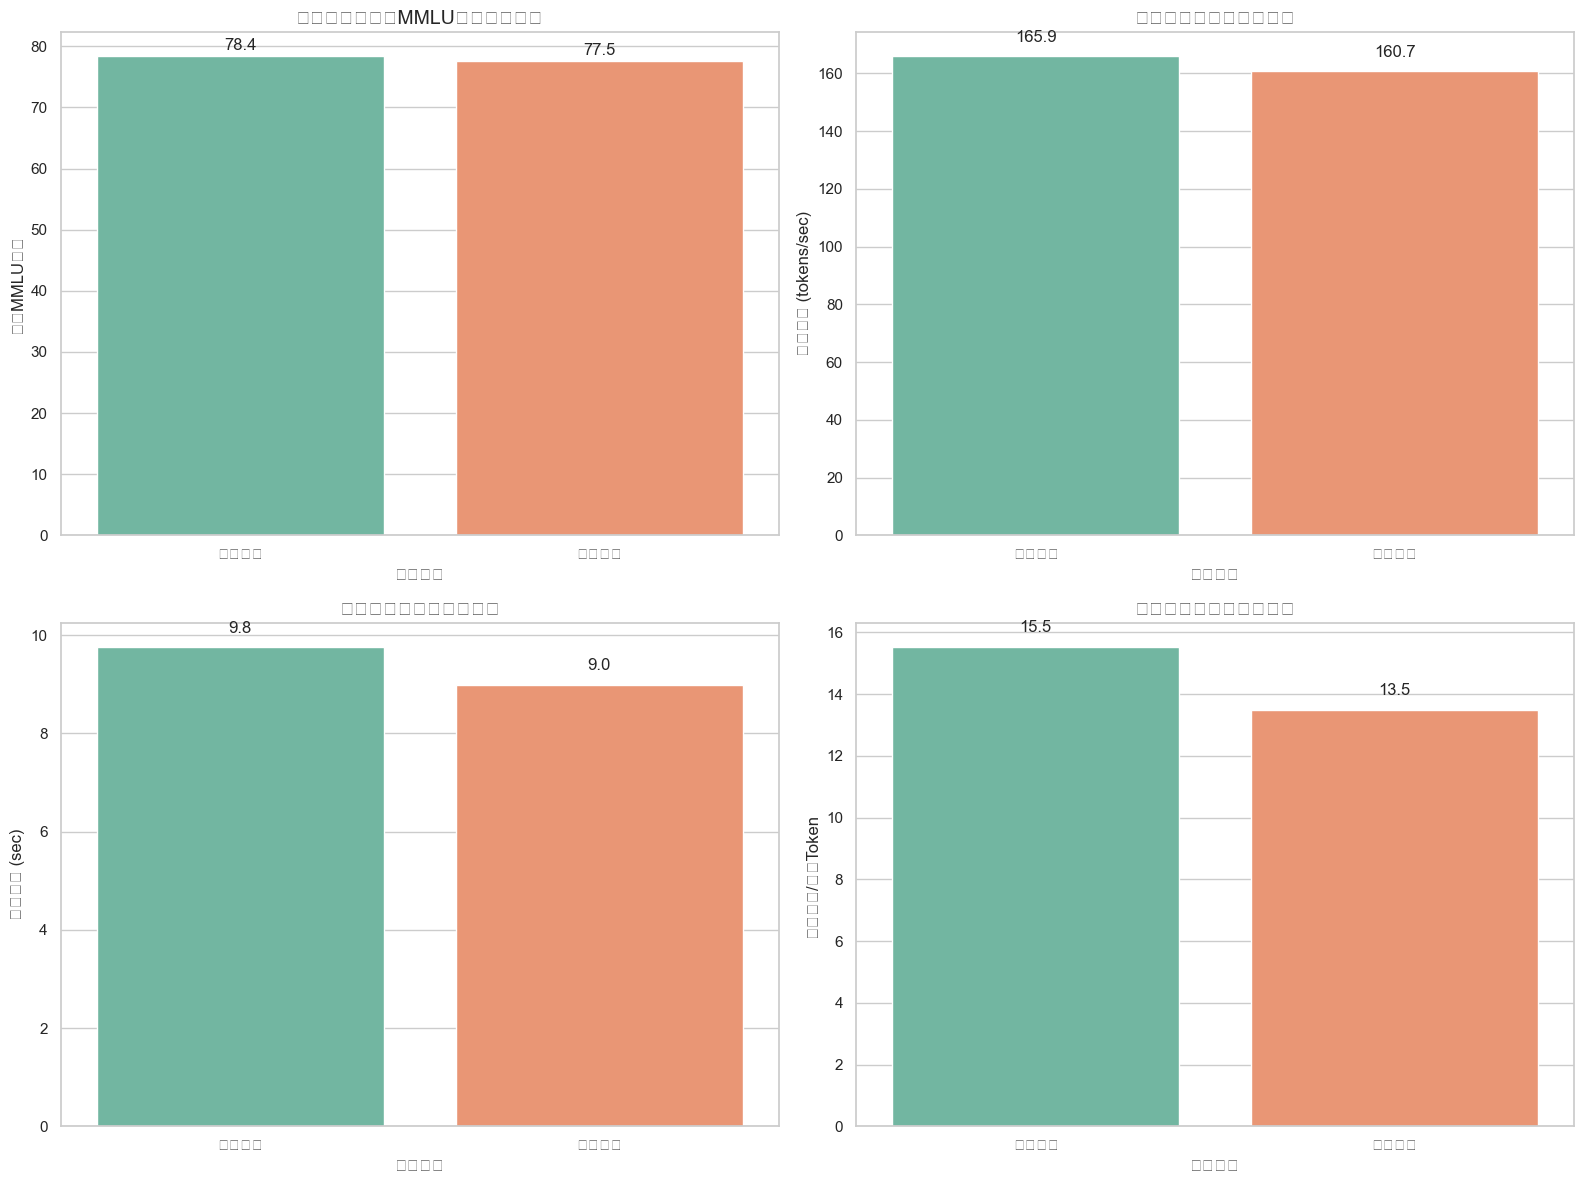

In [16]:
# This code is generated by GitHub Copilot (VS Code)
# 比较开源与闭源模型的性能
df['Open-Source'] = df['Open-Source'].astype(int)
df['Open-Source Type'] = df['Open-Source'].map({1: '开源模型', 0: '闭源模型'})

# 创建分组比较数据
opensource_metrics = df.groupby('Open-Source Type').agg({
    'Context Window': 'mean',
    'Speed (tokens/sec)': 'mean',
    'Latency (sec)': 'mean',
    'Benchmark (MMLU)': 'mean',
    'Benchmark (Chatbot Arena)': 'mean',
    'Price / Million Tokens': 'mean',
    'Training Dataset Size': 'mean',
    'Compute Power': 'mean',
    'Quality Rating': 'mean'
}).reset_index()

# 创建多个子图比较开源与闭源模型
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. MMLU基准测试分数
sns.barplot(x='Open-Source Type', y='Benchmark (MMLU)', data=opensource_metrics, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('开源与闭源模型MMLU基准测试分数', fontsize=14)
axes[0, 0].set_xlabel('模型类型', fontsize=12)
axes[0, 0].set_ylabel('平均MMLU分数', fontsize=12)
for i, v in enumerate(opensource_metrics['Benchmark (MMLU)']):
    axes[0, 0].text(i, v + 1, f'{v:.1f}', ha='center')

# 2. 速度比较
sns.barplot(x='Open-Source Type', y='Speed (tokens/sec)', data=opensource_metrics, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('开源与闭源模型速度比较', fontsize=14)
axes[0, 1].set_xlabel('模型类型', fontsize=12)
axes[0, 1].set_ylabel('平均速度 (tokens/sec)', fontsize=12)
for i, v in enumerate(opensource_metrics['Speed (tokens/sec)']):
    axes[0, 1].text(i, v + 5, f'{v:.1f}', ha='center')

# 3. 延迟比较
sns.barplot(x='Open-Source Type', y='Latency (sec)', data=opensource_metrics, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('开源与闭源模型延迟比较', fontsize=14)
axes[1, 0].set_xlabel('模型类型', fontsize=12)
axes[1, 0].set_ylabel('平均延迟 (sec)', fontsize=12)
for i, v in enumerate(opensource_metrics['Latency (sec)']):
    axes[1, 0].text(i, v + 0.3, f'{v:.1f}', ha='center')

# 4. 价格比较
sns.barplot(x='Open-Source Type', y='Price / Million Tokens', data=opensource_metrics, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('开源与闭源模型价格比较', fontsize=14)
axes[1, 1].set_xlabel('模型类型', fontsize=12)
axes[1, 1].set_ylabel('平均价格/百万Token', fontsize=12)
for i, v in enumerate(opensource_metrics['Price / Million Tokens']):
    axes[1, 1].text(i, v + 0.5, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3149445635.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  context_window_metrics = df.groupby('Context Window Range').agg({
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3149445635.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Context Window Range', y='Benchmark (MMLU)', data=context_window_metrics, ax=axes[0, 0], palette='YlOrRd')
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\3149445635.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s

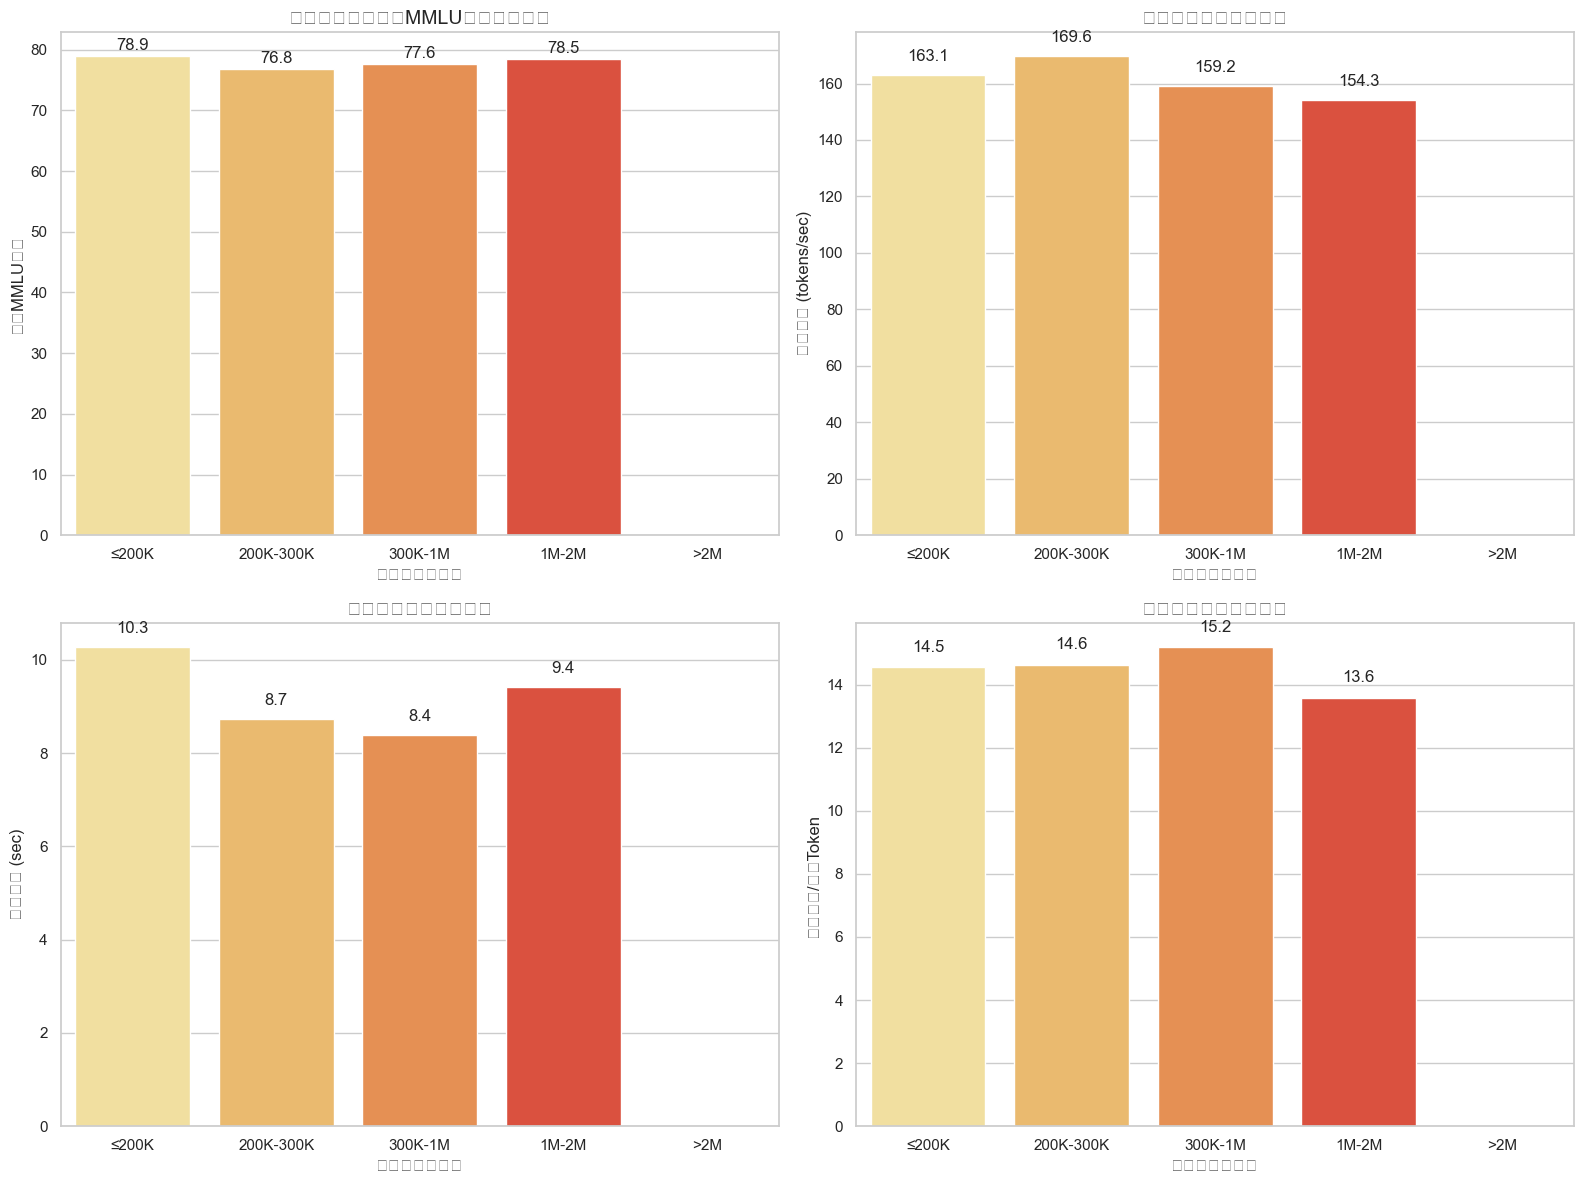

In [17]:
# This code is generated by GitHub Copilot (VS Code)
# 分析上下文窗口大小与性能的关系
# 将上下文窗口大小分成几个区间
bins = [0, 200000, 300000, 1000000, 2000000, float('inf')]
labels = ['≤200K', '200K-300K', '300K-1M', '1M-2M', '>2M']
df['Context Window Range'] = pd.cut(df['Context Window'], bins=bins, labels=labels)

# 按上下文窗口大小分组计算平均性能指标
context_window_metrics = df.groupby('Context Window Range').agg({
    'Speed (tokens/sec)': 'mean',
    'Latency (sec)': 'mean',
    'Benchmark (MMLU)': 'mean',
    'Benchmark (Chatbot Arena)': 'mean',
    'Price / Million Tokens': 'mean',
    'Quality Rating': 'mean'
}).reset_index()

# 绘制上下文窗口大小与性能指标的关系
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 上下文窗口大小与MMLU分数
sns.barplot(x='Context Window Range', y='Benchmark (MMLU)', data=context_window_metrics, ax=axes[0, 0], palette='YlOrRd')
axes[0, 0].set_title('上下文窗口大小与MMLU基准测试分数', fontsize=14)
axes[0, 0].set_xlabel('上下文窗口大小', fontsize=12)
axes[0, 0].set_ylabel('平均MMLU分数', fontsize=12)
for i, v in enumerate(context_window_metrics['Benchmark (MMLU)']):
    axes[0, 0].text(i, v + 1, f'{v:.1f}', ha='center')

# 2. 上下文窗口大小与速度
sns.barplot(x='Context Window Range', y='Speed (tokens/sec)', data=context_window_metrics, ax=axes[0, 1], palette='YlOrRd')
axes[0, 1].set_title('上下文窗口大小与速度', fontsize=14)
axes[0, 1].set_xlabel('上下文窗口大小', fontsize=12)
axes[0, 1].set_ylabel('平均速度 (tokens/sec)', fontsize=12)
for i, v in enumerate(context_window_metrics['Speed (tokens/sec)']):
    axes[0, 1].text(i, v + 5, f'{v:.1f}', ha='center')

# 3. 上下文窗口大小与延迟
sns.barplot(x='Context Window Range', y='Latency (sec)', data=context_window_metrics, ax=axes[1, 0], palette='YlOrRd')
axes[1, 0].set_title('上下文窗口大小与延迟', fontsize=14)
axes[1, 0].set_xlabel('上下文窗口大小', fontsize=12)
axes[1, 0].set_ylabel('平均延迟 (sec)', fontsize=12)
for i, v in enumerate(context_window_metrics['Latency (sec)']):
    axes[1, 0].text(i, v + 0.3, f'{v:.1f}', ha='center')

# 4. 上下文窗口大小与价格
sns.barplot(x='Context Window Range', y='Price / Million Tokens', data=context_window_metrics, ax=axes[1, 1], palette='YlOrRd')
axes[1, 1].set_title('上下文窗口大小与价格', fontsize=14)
axes[1, 1].set_xlabel('上下文窗口大小', fontsize=12)
axes[1, 1].set_ylabel('平均价格/百万Token', fontsize=12)
for i, v in enumerate(context_window_metrics['Price / Million Tokens']):
    axes[1, 1].text(i, v + 0.5, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\2819507856.py:34: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\2819507856.py:34: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\2819507856.py:34: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\2819507856.py:34: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\2819507856.py:34: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jacwu\AppData\Local\Temp\ipykernel_23380\2819507856.py:34: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6})

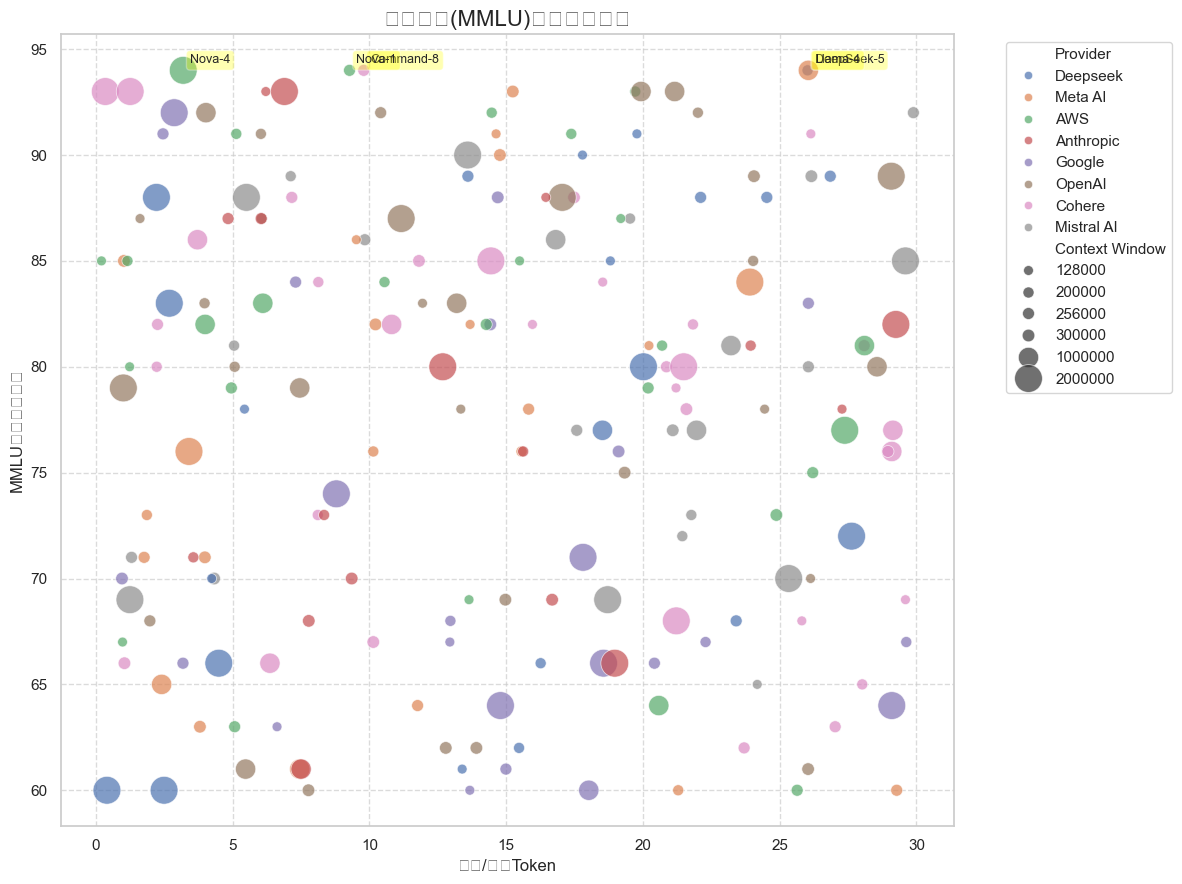

In [18]:
# This code is generated by GitHub Copilot (VS Code)
# 绘制性能与价格的散点图
plt.figure(figsize=(12, 9))

# 使用不同颜色表示不同提供商
scatter = sns.scatterplot(
    data=df,
    x='Price / Million Tokens',
    y='Benchmark (MMLU)',
    hue='Provider',
    size='Context Window',
    sizes=(50, 400),
    alpha=0.7
)

plt.title('模型性能(MMLU)与价格的关系', fontsize=16)
plt.xlabel('价格/百万Token', fontsize=12)
plt.ylabel('MMLU基准测试分数', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加一些特殊模型的标注
top_models = df.nlargest(5, 'Benchmark (MMLU)')
for i, row in top_models.iterrows():
    plt.annotate(
        row['Model'],
        xy=(row['Price / Million Tokens'], row['Benchmark (MMLU)']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3)
    )

plt.tight_layout()
plt.show()

## 6. 分析总结与结论

通过对大语言模型比较数据集的分析，我们可以得出以下几点主要结论：

1. **提供商比较**：
   - 不同提供商的模型在性能、速度和价格上存在明显差异
   - 某些提供商在特定基准测试中表现更好，而在其他方面可能较弱

2. **开源与闭源模型**：
   - 分析显示了开源和闭源模型在性能和价格上的权衡
   - 开源模型通常提供更好的价格/性能比，但在某些基准测试上可能稍逊

3. **上下文窗口大小影响**：
   - 更大的上下文窗口通常与更高的延迟和更高的价格相关
   - 上下文窗口大小与模型性能之间的关系并不是简单的线性关系

4. **价格与性能权衡**：
   - 存在明显的价格与性能之间的权衡，但并非所有高价模型都提供最佳性能
   - 有些中等价位的模型在性能方面提供了良好的平衡

这些发现可以帮助开发者和企业根据自己的需求选择最适合的语言模型，同时权衡性能、速度和成本等因素。